# MNIST SVM & KNN classification using HOG features

Data files train.csv and test.csv contain gray-scale images of hang-drawn difits, from Zero through Nine.  
Each image is 28*28 size, for a total of 784 pixels.  
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel (higher numbers meaning darker),  with values from 0 to 255.  
Data composed out of 42K images for training and testset of 28K images without labels.  

###Import the relevant packages

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

###Read input data and split to train and test

In [51]:
# mnist_dir = "C:\\Users\\aymann\\PycharmProjects\\ComputureVision_ou_2019a\\mmn2\\MNIST\\"
test = True
test_size = 20000

# 1. load data set
train_data = pd.read_csv("../input/train.csv")
train_data.reset_index()

np.random.seed(10)
n_sample = len(train_data)
order = np.random.permutation(n_sample)
train_data = train_data.iloc[order]

if test:
    train_data = train_data.head(test_size)

X = train_data.drop("label", 1)
y = train_data['label']


split to train and test sets (30% of data to be used as validation)

In [52]:
(trainData, valData, trainLabels, valLabels) = train_test_split(X,y, test_size=0.3, random_state=42)

Let's start with knn classification

###KNN classification

Given a new point(image), find the k closest images from training data.  
Each image represented using a combination of d features- a d-dim vector.  
Basic representation of an image will be it's grayscal pixels values.  
Distance between images is calculated using distance function- I will use Euclidian distance.  

The logic is as follow:  
Given a new input image do:  
* Calc distance between the input image to each of the training images  
* Sort training images according to their distance from input image, smallest to largest  
* Pull top k training images  
* Among these K neighbors, count the number of data points to each category  
* assign the new data point to the category where you counted the most neighbors  

In [53]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [54]:
def knn(trainData, valData, trainLabels, valLabels,kVals = range(1, 15, 2)):
    accuracies = []
    best_accuracy = 0
    valPred_best = None
    valPred_prob_best = None
    confusion_best=None
    best_model=None
    best_k = 1
    i = 0

    for k in kVals:
        print("k = " + str(k) + " begin ")
        start = time.time()
        # train the k-Nearest Neighbor classifier with the current value of `k`
        # model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabels)
        valPred = model.predict(valData)
        valPred_prob = model.predict_proba(valData)

        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        accuracies.append(score)
        end = time.time()

        # output performance
        print("classification report:")
        print(classification_report(valLabels, valPred))
        print("confusion matrix:")
        print(confusion_matrix(valLabels, valPred))
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        print("Complete time: " + str(end - start) + " Secs.")

        if accuracies[i] > best_accuracy:
            best_k = k
            best_accuracy = accuracies[i]
            valPred_best = valPred
            valPred_prob_best = valPred_prob
            confusion_best=confusion_matrix(valLabels, valPred)
            best_model=model
        i = +1

    # plt.xlabel('K value (number of neighbors)')
    # plt.ylabel('accuracy of validation set (25%)')

    # find the value of k that has the largest accuracy
    i = int(np.argmax(accuracies))
    print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))
    # # plot accuracy by K values
    # plt.plot(kVals, accuracies)
    return valPred_best, valPred_prob_best,confusion_best,accuracies,kVals,best_model


First, let's execute knn classification using image pixels as features

In [55]:
valPred, valPred_prob,confusion_best,accuracies,kVals,best_model_knn = knn(trainData, valData, trainLabels, valLabels)

k = 1 begin 


classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       587
           1       0.95      0.99      0.97       651
           2       0.97      0.96      0.96       609
           3       0.95      0.95      0.95       642
           4       0.96      0.95      0.95       550
           5       0.96      0.95      0.95       550
           6       0.97      0.98      0.98       613
           7       0.95      0.96      0.96       641
           8       0.96      0.91      0.94       575
           9       0.92      0.92      0.92       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[578   0   1   0   0   0   4   0   2   2]
 [  0 646   2   0   1   0   0   1   0   1]
 [  2   9 582   2   0   1   0   8   4   1]
 [  0   1   5 609   0   9   1   4   8   5]
 [  0   4   0   0 523   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       587
           1       0.94      1.00      0.97       651
           2       0.97      0.95      0.96       609
           3       0.94      0.95      0.95       642
           4       0.97      0.97      0.97       550
           5       0.97      0.95      0.96       550
           6       0.98      0.98      0.98       613
           7       0.95      0.97      0.96       641
           8       0.97      0.89      0.93       575
           9       0.94      0.94      0.94       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[579   1   0   0   0   0   5   1   0   1]
 [  0 650   0   0   0   0   0   1   0   0]
 [  3  10 581   0   0   0   0   9   5   1]
 [  1   2   7 613   0   6   0   3   7   3]
 [  0   3   0   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       587
           1       0.92      1.00      0.96       651
           2       0.98      0.94      0.96       609
           3       0.94      0.95      0.95       642
           4       0.97      0.97      0.97       550
           5       0.97      0.95      0.96       550
           6       0.98      0.98      0.98       613
           7       0.95      0.96      0.96       641
           8       0.97      0.88      0.92       575
           9       0.93      0.94      0.94       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[578   1   0   1   0   0   5   0   0   2]
 [  0 649   0   0   0   0   0   1   0   1]
 [  4  15 572   0   1   1   0   9   5   2]
 [  1   4   6 611   0   5   0   4   8   3]
 [  1   3   0   0 531   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       587
           1       0.92      1.00      0.96       651
           2       0.99      0.94      0.96       609
           3       0.95      0.95      0.95       642
           4       0.97      0.95      0.96       550
           5       0.95      0.95      0.95       550
           6       0.97      0.98      0.98       613
           7       0.95      0.96      0.96       641
           8       0.97      0.89      0.93       575
           9       0.93      0.94      0.93       582

   micro avg       0.95      0.95      0.95      6000
   macro avg       0.96      0.95      0.95      6000
weighted avg       0.96      0.95      0.95      6000

confusion matrix:
[[578   1   0   0   0   0   6   0   0   2]
 [  0 650   0   0   0   0   0   0   0   1]
 [  5  14 572   1   1   1   0   9   5   1]
 [  2   4   6 607   0   8   0   4   7   4]
 [  1   4   0   0 525   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       587
           1       0.91      1.00      0.95       651
           2       0.98      0.93      0.96       609
           3       0.94      0.94      0.94       642
           4       0.98      0.95      0.96       550
           5       0.96      0.95      0.95       550
           6       0.97      0.98      0.97       613
           7       0.94      0.96      0.95       641
           8       0.97      0.88      0.92       575
           9       0.92      0.94      0.93       582

   micro avg       0.95      0.95      0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

confusion matrix:
[[578   1   0   0   0   0   6   1   0   1]
 [  0 650   0   0   0   0   0   0   0   1]
 [  5  17 569   1   1   1   0   9   5   1]
 [  1   5   7 601   0   7   0   6   9   6]
 [  1   5   0   0 521   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       587
           1       0.90      1.00      0.95       651
           2       0.98      0.92      0.95       609
           3       0.94      0.94      0.94       642
           4       0.97      0.96      0.96       550
           5       0.96      0.95      0.96       550
           6       0.97      0.98      0.97       613
           7       0.95      0.96      0.95       641
           8       0.97      0.89      0.93       575
           9       0.93      0.94      0.93       582

   micro avg       0.95      0.95      0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

confusion matrix:
[[578   1   0   0   0   0   6   1   0   1]
 [  0 650   0   0   1   0   0   0   0   0]
 [  5  19 563   2   1   1   2   9   5   2]
 [  2   5   8 601   0   6   0   8   7   5]
 [  1   5   0   0 526   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       587
           1       0.90      1.00      0.95       651
           2       0.99      0.93      0.96       609
           3       0.94      0.93      0.93       642
           4       0.97      0.94      0.96       550
           5       0.96      0.95      0.95       550
           6       0.97      0.97      0.97       613
           7       0.94      0.96      0.95       641
           8       0.97      0.88      0.92       575
           9       0.91      0.94      0.92       582

   micro avg       0.95      0.95      0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

confusion matrix:
[[578   1   0   0   0   0   6   1   0   1]
 [  0 650   0   0   1   0   0   0   0   0]
 [  5  18 564   2   1   1   2  10   5   1]
 [  3   6   7 597   0   8   0   8   7   6]
 [  1   6   0   0 518   0   

plot accuracy by different k values

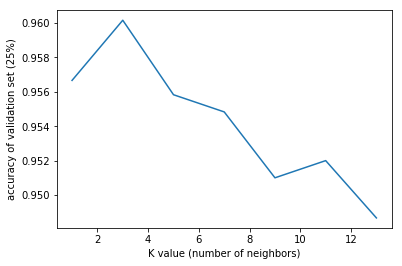

In [56]:
plt.xlabel('K value (number of neighbors)')
plt.ylabel('accuracy of validation set (25%)')
# plot accuracy by K values
plt.plot(kVals, accuracies)

plot ROC curve for each one of the 10 classes

In [57]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def plot_roc(test_y, tesy_y_prob, title=''):
    n_classes = np.unique(test_y).shape[0]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.where(test_y == i, 1, 0), tesy_y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area

    test_y_multi = tesy_y_prob
    for i in range(n_classes):
        test_y_multi[:, i] = np.where(test_y == i, 1, 0)
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_multi.ravel(), tesy_y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw = 2
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class %d (area = %.4f%%)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC multi-class')
    plt.legend(loc="lower right")
    plt.title(title)
    # plt.show()

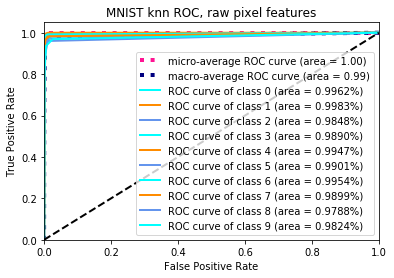

In [58]:
plot_roc(valLabels, valPred_prob, title="MNIST knn ROC, raw pixel features")

plot confusion matrix

In [59]:
def plot_confusion(confusion_matrix):
    plt.figure()
    plt.matshow(confusion_matrix)
    plt.title('Confusion Matrix for Validation Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

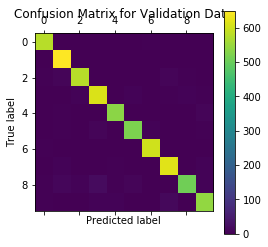

In [60]:
plot_confusion(confusion_best)

Now let's use HOG features instead

###Hog features

The technique counts occurences of gradient orientation in localized portion of an image.  
This method is similar to that of edge orientation histograms, scale- invariant features transform descriptors and shape contexts, but differ in that it is computres on a dense grid of uniformly spaced cells and uses overlapping local contrast notmalization for improved accuracy.  
The first step to calculate is the computation of the gradient values where the most common method is to applay the 1-D centered, point discrete derivative mask in one or both of the horizontal and vertical directions.  
The second step is creating the cell histogram. Each pixel within the cell casts a weighted vote for an orientation-based histogram channel based on the values found in the gradient computation.  
The cells themselves can either be rectangular or radiel in shape, and the histogram channel are evenly spread over 0 to 180 degrees.  
To account for changes in illumination and contrast, the gradient strengths must be locally normalized, which requires grouping the cells together into larger, spatially connected blocks.  
The HOG descriptor is then the concateneted vector of the componenets of the normalized cell histogram from all the block regions.  
To test this features with KNN and later SVM classifiers, I used 3 orientation bins, cell size of 2*2, 4*4 cells per block with L2 normalization.

In [61]:
import scipy.misc
from skimage import feature

def hog_representation(image, orientations, pixelsPerCell, cellsPerBlock, block_norm):
    hist = feature.hog(image, orientations=orientations,
                       pixels_per_cell=pixelsPerCell,
                       cells_per_block=cellsPerBlock,
                       block_norm=block_norm)
    return hist

def hog_batch_representation(images, orientations, pixelsPerCell, cellsPerBlock, block_norm):
    print("started! HOG features extraction for batch")
    result = []
    for image in images:
        # describe the image and update the data matrix
        hist = hog_representation(image, orientations, pixelsPerCell, cellsPerBlock, block_norm)
        result.append(hist)
        
    print("finish! HOG features extraction for batch")
    return result

In [62]:
trainDigits = np.asarray(trainData).reshape((trainData.shape[0], 28, 28))
valDigits = np.asarray(valData).reshape((valData.shape[0], 28, 28))

hog_rep_train = hog_batch_representation(trainDigits, orientations=3, pixelsPerCell=(2, 2),
                                                  cellsPerBlock=(4, 4), block_norm='L2-Hys')
hog_rep_val = hog_batch_representation(valDigits, orientations=3, pixelsPerCell=(2, 2), cellsPerBlock=(4, 4),
                                                block_norm='L2-Hys')
trainDataHog = np.array(hog_rep_train)
valDataHog = np.array(hog_rep_val)

started! HOG features extraction for batch


finish! HOG features extraction for batch
started! HOG features extraction for batch


finish! HOG features extraction for batch


now let's run KNN classifier with HOG features on top of each image as input

In [63]:
valPred, valPred_prob,confusion_best,accuracies,kVals,best_model_knn_hog = knn(trainDataHog, valDataHog, trainLabels, valLabels)

k = 1 begin 


classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       587
           1       0.97      0.99      0.98       651
           2       0.98      0.98      0.98       609
           3       0.99      0.95      0.97       642
           4       0.98      0.95      0.97       550
           5       0.97      0.96      0.97       550
           6       0.98      0.99      0.98       613
           7       0.97      0.96      0.97       641
           8       0.96      0.95      0.95       575
           9       0.92      0.96      0.94       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[583   0   0   0   0   1   2   0   0   1]
 [  1 646   1   0   2   0   0   0   0   1]
 [  2   2 597   0   0   0   0   2   6   0]
 [  2   0   4 613   0   5   0   6   9   3]
 [  0   2   2   0 523   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       587
           1       0.97      0.99      0.98       651
           2       0.98      0.98      0.98       609
           3       0.99      0.97      0.98       642
           4       0.99      0.96      0.97       550
           5       0.98      0.97      0.98       550
           6       0.98      0.99      0.99       613
           7       0.97      0.96      0.97       641
           8       0.97      0.95      0.96       575
           9       0.92      0.96      0.94       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[583   0   0   0   0   0   3   0   0   1]
 [  1 645   2   0   2   0   0   1   0   0]
 [  2   4 594   0   0   0   0   5   4   0]
 [  1   0   4 622   0   1   0   4   7   3]
 [  0   2   2   0 528   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       587
           1       0.96      0.99      0.98       651
           2       0.99      0.97      0.98       609
           3       0.99      0.96      0.97       642
           4       0.99      0.95      0.97       550
           5       0.98      0.97      0.98       550
           6       0.98      0.99      0.99       613
           7       0.97      0.96      0.96       641
           8       0.97      0.95      0.96       575
           9       0.92      0.96      0.94       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[584   0   0   0   0   0   2   0   0   1]
 [  1 646   2   0   1   0   0   1   0   0]
 [  1   5 592   0   0   0   0   8   3   0]
 [  3   1   4 616   0   2   0   4   8   4]
 [  1   3   1   0 524   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       587
           1       0.96      0.99      0.98       651
           2       0.98      0.97      0.98       609
           3       0.99      0.96      0.97       642
           4       0.99      0.94      0.97       550
           5       0.99      0.97      0.98       550
           6       0.98      0.99      0.99       613
           7       0.97      0.95      0.96       641
           8       0.97      0.94      0.95       575
           9       0.90      0.97      0.93       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[584   0   0   0   0   0   2   0   0   1]
 [  1 645   2   0   1   0   0   1   0   1]
 [  2   6 589   1   0   0   0   8   3   0]
 [  2   1   5 617   0   1   0   5   7   4]
 [  0   3   2   0 518   0   

classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       587
           1       0.95      0.99      0.97       651
           2       0.98      0.96      0.97       609
           3       0.99      0.96      0.97       642
           4       0.99      0.94      0.96       550
           5       0.99      0.97      0.98       550
           6       0.97      0.99      0.98       613
           7       0.97      0.96      0.96       641
           8       0.97      0.94      0.95       575
           9       0.90      0.97      0.93       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[583   0   0   0   0   0   3   0   0   1]
 [  1 645   3   0   1   0   0   0   0   1]
 [  4   7 587   1   0   0   0   7   3   0]
 [  3   1   5 615   0   1   0   5   8   4]
 [  1   3   2   0 515   0   

classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       587
           1       0.95      0.99      0.97       651
           2       0.98      0.96      0.97       609
           3       0.99      0.96      0.97       642
           4       0.99      0.94      0.96       550
           5       0.99      0.96      0.98       550
           6       0.98      0.99      0.98       613
           7       0.97      0.95      0.96       641
           8       0.97      0.93      0.95       575
           9       0.90      0.97      0.93       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[583   0   0   0   0   0   3   0   0   1]
 [  1 646   2   0   1   0   0   0   0   1]
 [  4   7 587   0   0   0   0   7   4   0]
 [  3   1   4 615   0   1   0   5   9   4]
 [  1   4   2   0 515   0   

classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       587
           1       0.95      0.99      0.97       651
           2       0.98      0.96      0.97       609
           3       0.99      0.95      0.97       642
           4       0.99      0.94      0.97       550
           5       0.99      0.97      0.98       550
           6       0.97      0.99      0.98       613
           7       0.96      0.95      0.96       641
           8       0.97      0.93      0.95       575
           9       0.90      0.97      0.93       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.97      0.96      0.96      6000
weighted avg       0.97      0.96      0.96      6000

confusion matrix:
[[582   0   0   0   0   0   4   0   0   1]
 [  1 645   3   0   1   0   0   0   0   1]
 [  3   7 586   0   0   0   0   8   5   0]
 [  4   2   4 613   0   1   0   6   8   4]
 [  1   4   2   0 517   0   

plot accuracy by different K values

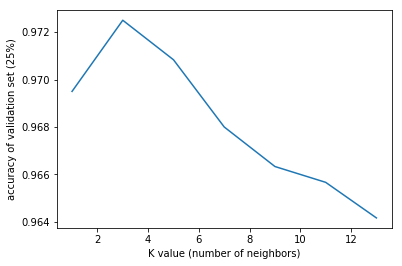

In [64]:
plt.xlabel('K value (number of neighbors)')
plt.ylabel('accuracy of validation set (25%)')
# plot accuracy by K values
plt.plot(kVals, accuracies)

plot ROC

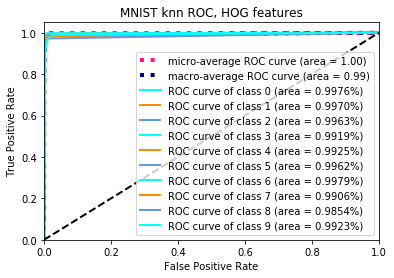

In [65]:
plot_roc(valLabels, valPred_prob, title="MNIST knn ROC, HOG features")

We can see that classifing with HOG features is much better than using the raw pixels on the image!
We managed to get to 97.25% accuracy on validation set!

Now let's see how's SVM performance

###SVM classification

The purpose in this method is to miximize the margin arround the separating hyperplane.  
Decosion function fully specified by a subset of training smaples, which are the supported vectors.  
For a 2-class, leaniarly separated, problem, we will perform the next steps:  
* Normalize point to be with 0 avg  
* Compute the convex hull of the positive points, and convex hull of negetive points  
* For each pait of points, one on the positive hull and the other on the negetive hull, compute the margin  
Choose the largest margin possible (which is the minimum margin received)  
  
If we have noises in out dataset, we can use slack variable, regularization parameter C, for misclassified points.  
Se we can choose the weight to give to misclassified points.  
Small C allows constraints to be easily ignored and provide large margin.  
Large C makes constraints hard to ignore and will create narrow margin.  

There is additional mathmatical knowladge involve in understanding the logic behind SVM, but I'll spare thie information in this report.

Below, I'll test the use of plinomial, radial and linear kernels together with different values of C.

In [66]:
from sklearn import svm

def SVM(trainData, valData, trainLabels, valLabels, CVals=[10 ** (-20), 10 ** (-10), 0.001, 0.1, 1],
        kernels=('poly', 'linear', 'rbf')):
    accuracies = []
    best_c = 10 ** (-20)
    best_kernel = 'poly'
    best_accuracy = 0
    valPred_best = None
    valPred_prob_best = None
    best_model = None
    confusion_best = None

    # for fig_num, kernel in enumerate(('poly', 'linear')):
    for fig_num, kernel in enumerate(kernels):
        print("kernal = " + kernel + " begin ")
        for c in CVals:
            print("C = " + str(c) + " begin ")
            start = time.time()
            # train the SVM classifier with the current value of `c`
            model = svm.SVC(kernel=kernel, C=c, degree=3, probability=True, gamma=10)
            model.fit(trainData, trainLabels)
            valPred = model.predict(valData)
            valPred_prob = model.predict_proba(valData)

            # evaluate the model and update the accuracies list
            score = model.score(valData, valLabels)
            accuracies.append(score)
            end = time.time()

            # output performance
            print("classification report:")
            print(classification_report(valLabels, valPred))
            print("confusion matrix:")
            print(confusion_matrix(valLabels, valPred))
            print("c=%d, accuracy=%.2f%%" % (c, score * 100))
            print("Complete time: " + str(end - start) + " Secs.")

            if score > best_accuracy:
                best_c = c
                best_kernel = kernel
                best_accuracy = score
                valPred_best = valPred
                valPred_prob_best = valPred_prob
                confusion_best = confusion_matrix(valLabels, valPred)
                best_model = model

        # plot accuracy by c values
        plt.figure(fig_num)
        plt.clf()
        plt.xlabel('c value (penalty)')
        plt.ylabel('accuracy of validation set (25%)')
        plt.title(kernel)
        plt.plot(CVals, accuracies)

        i = int(np.argmax(accuracies))
        print("c=%.2f%% achieved highest accuracy of %.2f%% on validation data" % (CVals[i], accuracies[i] * 100))
        accuracies = []
    # plt.show()

    print("c=%.2f%%, with %s kernel achieved highest accuracy of %.2f%% on validation data" % (
    best_c, best_kernel, best_accuracy * 100))
    return valPred_best, valPred_prob_best, confusion_best, best_model


kernal = poly begin 
C = 1e-20 begin 


classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       587
           1       0.97      0.99      0.98       651
           2       0.94      0.98      0.96       609
           3       0.96      0.93      0.95       642
           4       0.97      0.97      0.97       550
           5       0.96      0.95      0.96       550
           6       0.97      0.97      0.97       613
           7       0.96      0.97      0.97       641
           8       0.94      0.93      0.94       575
           9       0.96      0.94      0.95       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[570   0   3   0   1   4   4   0   4   1]
 [  0 643   1   1   1   0   0   2   3   0]
 [  1   2 595   1   1   1   2   3   3   0]
 [  2   3  18 597   0   7   2   5   6   2]
 [  1   0   3   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       587
           1       0.97      0.99      0.98       651
           2       0.94      0.98      0.96       609
           3       0.96      0.93      0.95       642
           4       0.97      0.97      0.97       550
           5       0.96      0.95      0.96       550
           6       0.97      0.97      0.97       613
           7       0.96      0.97      0.97       641
           8       0.94      0.93      0.94       575
           9       0.96      0.94      0.95       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[570   0   3   0   1   4   4   0   4   1]
 [  0 643   1   1   1   0   0   2   3   0]
 [  1   2 595   1   1   1   2   3   3   0]
 [  2   3  18 597   0   7   2   5   6   2]
 [  1   0   3   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       587
           1       0.97      0.99      0.98       651
           2       0.94      0.98      0.96       609
           3       0.96      0.93      0.95       642
           4       0.97      0.97      0.97       550
           5       0.96      0.95      0.96       550
           6       0.97      0.97      0.97       613
           7       0.96      0.97      0.97       641
           8       0.94      0.93      0.94       575
           9       0.96      0.94      0.95       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[570   0   3   0   1   4   4   0   4   1]
 [  0 643   1   1   1   0   0   2   3   0]
 [  1   2 595   1   1   1   2   3   3   0]
 [  2   3  18 597   0   7   2   5   6   2]
 [  1   0   3   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       587
           1       0.97      0.99      0.98       651
           2       0.94      0.98      0.96       609
           3       0.96      0.93      0.95       642
           4       0.97      0.97      0.97       550
           5       0.96      0.95      0.96       550
           6       0.97      0.97      0.97       613
           7       0.96      0.97      0.97       641
           8       0.94      0.93      0.94       575
           9       0.96      0.94      0.95       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[570   0   3   0   1   4   4   0   4   1]
 [  0 643   1   1   1   0   0   2   3   0]
 [  1   2 595   1   1   1   2   3   3   0]
 [  2   3  18 597   0   7   2   5   6   2]
 [  1   0   3   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       587
           1       0.97      0.99      0.98       651
           2       0.94      0.98      0.96       609
           3       0.96      0.93      0.95       642
           4       0.97      0.97      0.97       550
           5       0.96      0.95      0.96       550
           6       0.97      0.97      0.97       613
           7       0.96      0.97      0.97       641
           8       0.94      0.93      0.94       575
           9       0.96      0.94      0.95       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[570   0   3   0   1   4   4   0   4   1]
 [  0 643   1   1   1   0   0   2   3   0]
 [  1   2 595   1   1   1   2   3   3   0]
 [  2   3  18 597   0   7   2   5   6   2]
 [  1   0   3   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       587
           1       0.95      0.98      0.97       651
           2       0.89      0.93      0.91       609
           3       0.86      0.88      0.87       642
           4       0.90      0.94      0.92       550
           5       0.88      0.85      0.86       550
           6       0.95      0.95      0.95       613
           7       0.92      0.93      0.92       641
           8       0.93      0.83      0.88       575
           9       0.88      0.84      0.86       582

   micro avg       0.91      0.91      0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

confusion matrix:
[[569   0   3   3   1   4   3   0   1   3]
 [  0 640   2   1   1   1   0   2   3   1]
 [  2   8 566  10   4   3   5   6   4   1]
 [  2   4  21 562   0  28   2   8  12   3]
 [  1   1   7   1 515   0   

classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       587
           1       0.95      0.98      0.97       651
           2       0.89      0.93      0.91       609
           3       0.86      0.88      0.87       642
           4       0.90      0.94      0.92       550
           5       0.88      0.85      0.86       550
           6       0.95      0.95      0.95       613
           7       0.92      0.93      0.92       641
           8       0.93      0.83      0.88       575
           9       0.88      0.84      0.86       582

   micro avg       0.91      0.91      0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

confusion matrix:
[[569   0   3   3   1   4   3   0   1   3]
 [  0 640   2   1   1   1   0   2   3   1]
 [  2   8 566  10   4   3   5   6   4   1]
 [  2   4  21 562   0  28   2   8  12   3]
 [  1   1   7   1 515   0   

classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       587
           1       0.95      0.98      0.97       651
           2       0.89      0.93      0.91       609
           3       0.86      0.88      0.87       642
           4       0.90      0.94      0.92       550
           5       0.88      0.85      0.86       550
           6       0.95      0.95      0.95       613
           7       0.92      0.93      0.92       641
           8       0.93      0.83      0.88       575
           9       0.88      0.84      0.86       582

   micro avg       0.91      0.91      0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

confusion matrix:
[[569   0   3   3   1   4   3   0   1   3]
 [  0 640   2   1   1   1   0   2   3   1]
 [  2   8 566  10   4   3   5   6   4   1]
 [  2   4  21 562   0  28   2   8  12   3]
 [  1   1   7   1 515   0   

classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


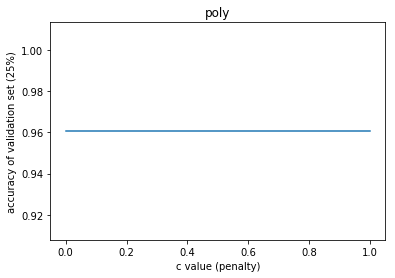

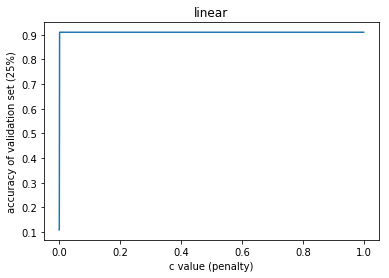

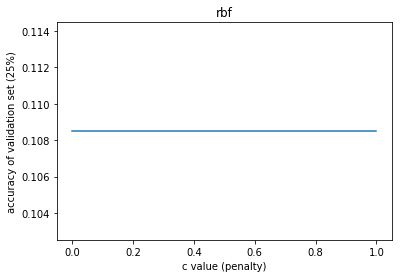

In [67]:
valPred, valPred_prob,confusion_best,best_model_svm = SVM(trainData, valData, trainLabels, valLabels)

plot ROC of best performed kernel and penelty

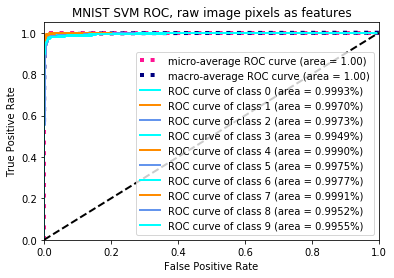

In [68]:
plot_roc(valLabels, valPred_prob, title="MNIST SVM ROC, raw image pixels as features")

Now let's try and use HOG features again, on SVM this time

kernal = poly begin 
C = 1e-20 begin 


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       587
           1       0.97      0.99      0.98       651
           2       0.95      0.99      0.97       609
           3       0.97      0.96      0.96       642
           4       0.97      0.97      0.97       550
           5       0.99      0.98      0.98       550
           6       0.99      0.98      0.98       613
           7       0.97      0.96      0.97       641
           8       0.96      0.95      0.96       575
           9       0.96      0.95      0.96       582

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

confusion matrix:
[[577   1   1   0   0   0   5   0   2   1]
 [  0 642   6   0   2   0   0   0   1   0]
 [  0   2 600   1   0   0   0   3   3   0]
 [  0   1  10 614   0   1   0   7   7   2]
 [  0   3   4   0 536   0   

classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       587
           1       0.99      1.00      0.99       651
           2       0.98      0.99      0.99       609
           3       0.99      0.98      0.98       642
           4       0.99      0.98      0.99       550
           5       0.99      0.99      0.99       550
           6       0.99      0.99      0.99       613
           7       0.98      0.99      0.99       641
           8       0.98      0.98      0.98       575
           9       0.98      0.98      0.98       582

   micro avg       0.99      0.99      0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

confusion matrix:
[[581   0   1   0   0   0   3   0   1   1]
 [  1 648   0   0   1   0   0   1   0   0]
 [  0   2 604   0   0   0   0   1   2   0]
 [  0   0   4 630   0   0   0   2   5   1]
 [  0   2   2   0 541   0   

classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       587
           1       0.99      1.00      0.99       651
           2       0.98      0.99      0.99       609
           3       0.99      0.98      0.98       642
           4       0.99      0.98      0.99       550
           5       0.99      0.99      0.99       550
           6       0.99      0.99      0.99       613
           7       0.98      0.99      0.99       641
           8       0.98      0.98      0.98       575
           9       0.98      0.98      0.98       582

   micro avg       0.99      0.99      0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

confusion matrix:
[[581   0   1   0   0   0   3   0   1   1]
 [  1 648   0   0   1   0   0   1   0   0]
 [  0   2 604   0   0   0   0   1   2   0]
 [  0   0   4 630   0   0   0   2   5   1]
 [  0   2   2   0 541   0   

classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       587
           1       0.99      1.00      0.99       651
           2       0.98      0.99      0.99       609
           3       0.99      0.98      0.98       642
           4       0.99      0.98      0.99       550
           5       0.99      0.99      0.99       550
           6       0.99      0.99      0.99       613
           7       0.98      0.99      0.99       641
           8       0.98      0.98      0.98       575
           9       0.98      0.98      0.98       582

   micro avg       0.99      0.99      0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

confusion matrix:
[[581   0   1   0   0   0   3   0   1   1]
 [  1 648   0   0   1   0   0   1   0   0]
 [  0   2 604   0   0   0   0   1   2   0]
 [  0   0   4 630   0   0   0   2   5   1]
 [  0   2   2   0 541   0   

classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       587
           1       0.98      0.98      0.98       651
           2       0.95      0.98      0.96       609
           3       0.96      0.94      0.95       642
           4       0.96      0.97      0.97       550
           5       0.97      0.97      0.97       550
           6       0.99      0.97      0.98       613
           7       0.96      0.95      0.95       641
           8       0.96      0.94      0.95       575
           9       0.94      0.94      0.94       582

   micro avg       0.96      0.96      0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

confusion matrix:
[[581   0   0   0   0   0   4   0   1   1]
 [  1 639   6   0   3   0   0   1   1   0]
 [  0   2 594   2   1   0   1   4   4   1]
 [  1   0  12 606   0   3   1   9   7   3]
 [  1   2   3   0 533   0   

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       587
           1       0.99      0.99      0.99       651
           2       0.96      0.98      0.97       609
           3       0.97      0.97      0.97       642
           4       0.98      0.97      0.97       550
           5       0.98      0.97      0.97       550
           6       0.99      0.98      0.98       613
           7       0.98      0.98      0.98       641
           8       0.98      0.97      0.97       575
           9       0.97      0.96      0.96       582

   micro avg       0.98      0.98      0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

confusion matrix:
[[582   0   1   0   0   0   2   0   1   1]
 [  1 646   1   1   1   0   0   1   0   0]
 [  1   2 598   2   1   0   0   2   3   0]
 [  1   0  13 623   0   1   0   1   2   1]
 [  0   2   1   0 534   0   

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       587
           1       0.99      0.99      0.99       651
           2       0.96      0.98      0.97       609
           3       0.97      0.97      0.97       642
           4       0.97      0.97      0.97       550
           5       0.98      0.97      0.97       550
           6       0.99      0.98      0.98       613
           7       0.98      0.98      0.98       641
           8       0.98      0.97      0.97       575
           9       0.97      0.96      0.96       582

   micro avg       0.98      0.98      0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

confusion matrix:
[[581   0   1   0   0   0   3   0   1   1]
 [  1 645   1   1   1   0   0   1   1   0]
 [  1   2 599   2   1   0   0   2   2   0]
 [  1   0  14 622   0   1   0   1   2   1]
 [  0   3   1   0 533   0   

classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       587
           1       0.11      1.00      0.20       651
           2       0.00      0.00      0.00       609
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       550
           5       0.00      0.00      0.00       550
           6       0.00      0.00      0.00       613
           7       0.00      0.00      0.00       641
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       582

   micro avg       0.11      0.11      0.11      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.11      0.02      6000

confusion matrix:
[[  0 587   0   0   0   0   0   0   0   0]
 [  0 651   0   0   0   0   0   0   0   0]
 [  0 609   0   0   0   0   0   0   0   0]
 [  0 642   0   0   0   0   0   0   0   0]
 [  0 550   0   0   0   0   

C:\Users\aymann\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


c=0.00%, with poly kernel achieved highest accuracy of 98.57% on validation data


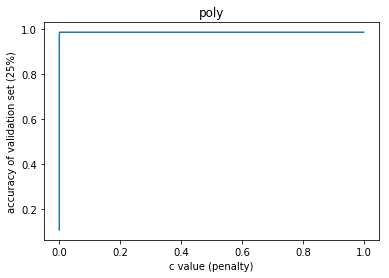

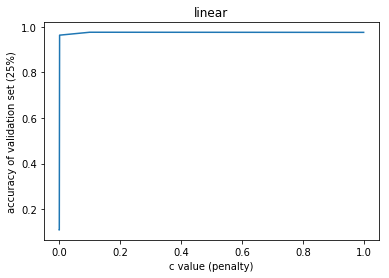

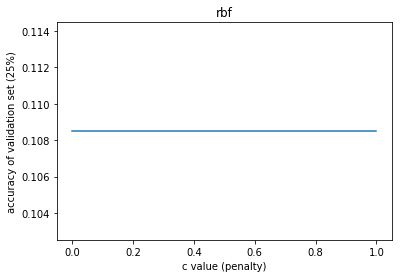

In [69]:
valPred, valPred_prob,confusion_best,best_model_svm_hog = SVM(trainDataHog, valDataHog, trainLabels, valLabels)

Plot ROC of best performed kernel and penelty

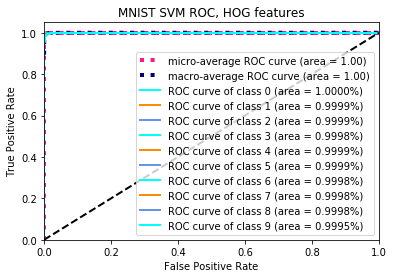

In [72]:
plot_roc(valLabels, valPred_prob, title="MNIST SVM ROC, HOG features")

best performed classification is SVM with polynomial kernel, using penelty value of 0.001, with HOG features. accuracy on validation set is 98.57%!
Now let's use this classifier to classify test file, and submit!

###Submission

In [70]:
# test = pd.read_csv("C:\\Users\\aymann\\PycharmProjects\\ComputureVision_ou_2019a\\mmn2\\MNIST\\test.csv")
test = pd.read_csv("../input/test.csv")
testDigits = np.asarray(test).reshape((test.shape[0], 28, 28))
hog_rep_test = hog_batch_representation(testDigits, orientations=3, pixelsPerCell=(2, 2),
                                        cellsPerBlock=(4, 4), block_norm='L2-Hys')

testDataHog = np.array(hog_rep_test)

results = best_model_svm_hog.predict(testDataHog)
# np.savetxt("C:\\Users\\aymann\\PycharmProjects\\ComputureVision_ou_2019a\\mmn2\\MNIST\\test_results.csv",
np.savetxt("test_results.csv",
           np.c_[range(1, len(test) + 1), results],
           delimiter=',',
           header='ImageId,Label',
           comments='',
           fmt='%d')


started! HOG features extraction for batch


finish! HOG features extraction for batch
